# Signal detection model (equal variance Gaussian model)

Signal detection models are applied models from signal detection theory (SDT). SDT was devloped in the field of psychophysics and provides a general framework to describe descisions made under uncertainty and the descision is binary. 

In [1]:
# Import data analysis and visualisation packages.
import numpy as np
import pandas as pd
import stan as ps
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import arviz as az

# Importing nest_asyncio is only necessary to run pystan in Jupyter Notebooks.
import nest_asyncio
nest_asyncio.apply()

In [36]:
# Stan translation the JAGS single subject SDT model in Farrell and Stephan lewandosky
sdm = """
data{
int sigtrial;
int noisetrial;

// Data must be speciifed as integer for the binomial likelihood
int h;
int f;
}

parameters{
real d;
real b;
}
transformed parameters{
// Area under curve standard normal (phi function)
real phih = Phi(d/2-b);
real phif = Phi(-d/2-b);
}
model{
// Priors
d ~ normal(1,1);
b ~ normal(0,1);

// Likelihood
h ~ binomial(sigtrial, phih);
f ~ binomial(noisetrial, phif);
}
"""

In [37]:
# Generated data used in Farrell and lewandowsky - results are similar
data = {'h': 60,
        'f': 11,
        'sigtrial': 100,
        'noisetrial': 100}

In [38]:
# Generate warnings about priors but this is Stan verbose mode errors 
# resulting from specification in transformed parameters block.
# and the algorithm is working fine.
sm = ps.build(sdm, data=data)

Building...



Building: 47.9s, done.Messages from stanc:


In [73]:
%%capture
fit = sm.sample(num_chains = 4, num_samples = 1000)

In [74]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
d,1.463,0.212,1.103,1.880,0.004,0.003,2817.0,2762.0,1.0
b,0.482,0.105,0.292,0.685,0.002,0.001,2734.0,2372.0,1.0
phih,0.598,0.048,0.506,0.686,0.001,0.001,3917.0,2845.0,1.0
phif,0.116,0.032,0.057,0.175,0.001,0.000,2388.0,2012.0,1.0


In [65]:
# Extract posterio smaples into pandas dataframe
fit_df = fit.to_frame()

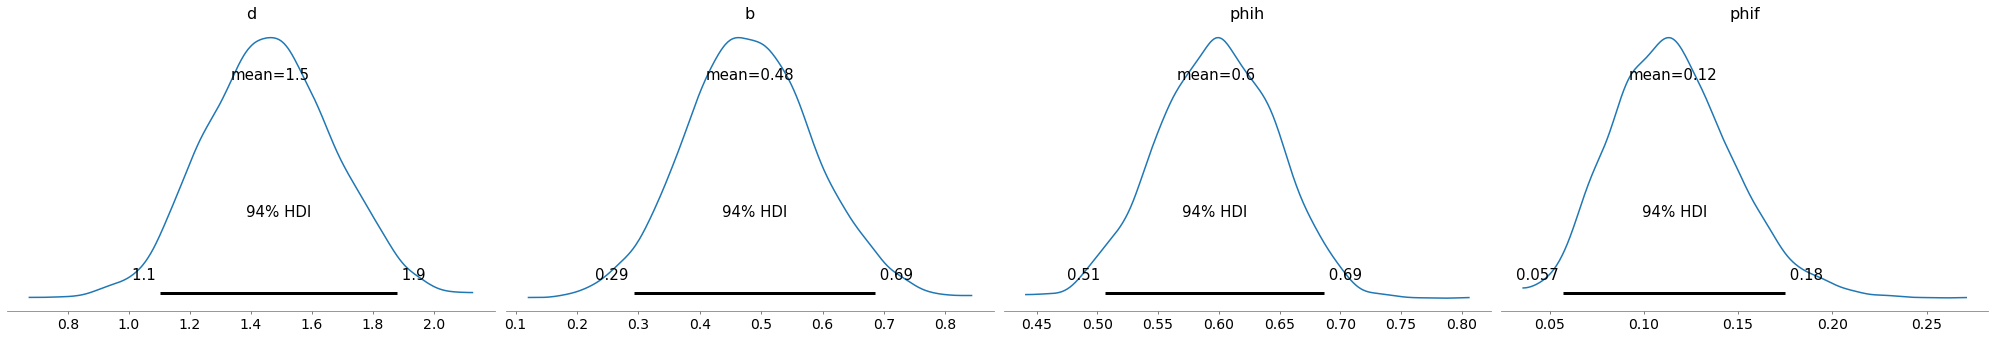

In [68]:
az.plot_posterior(fit);

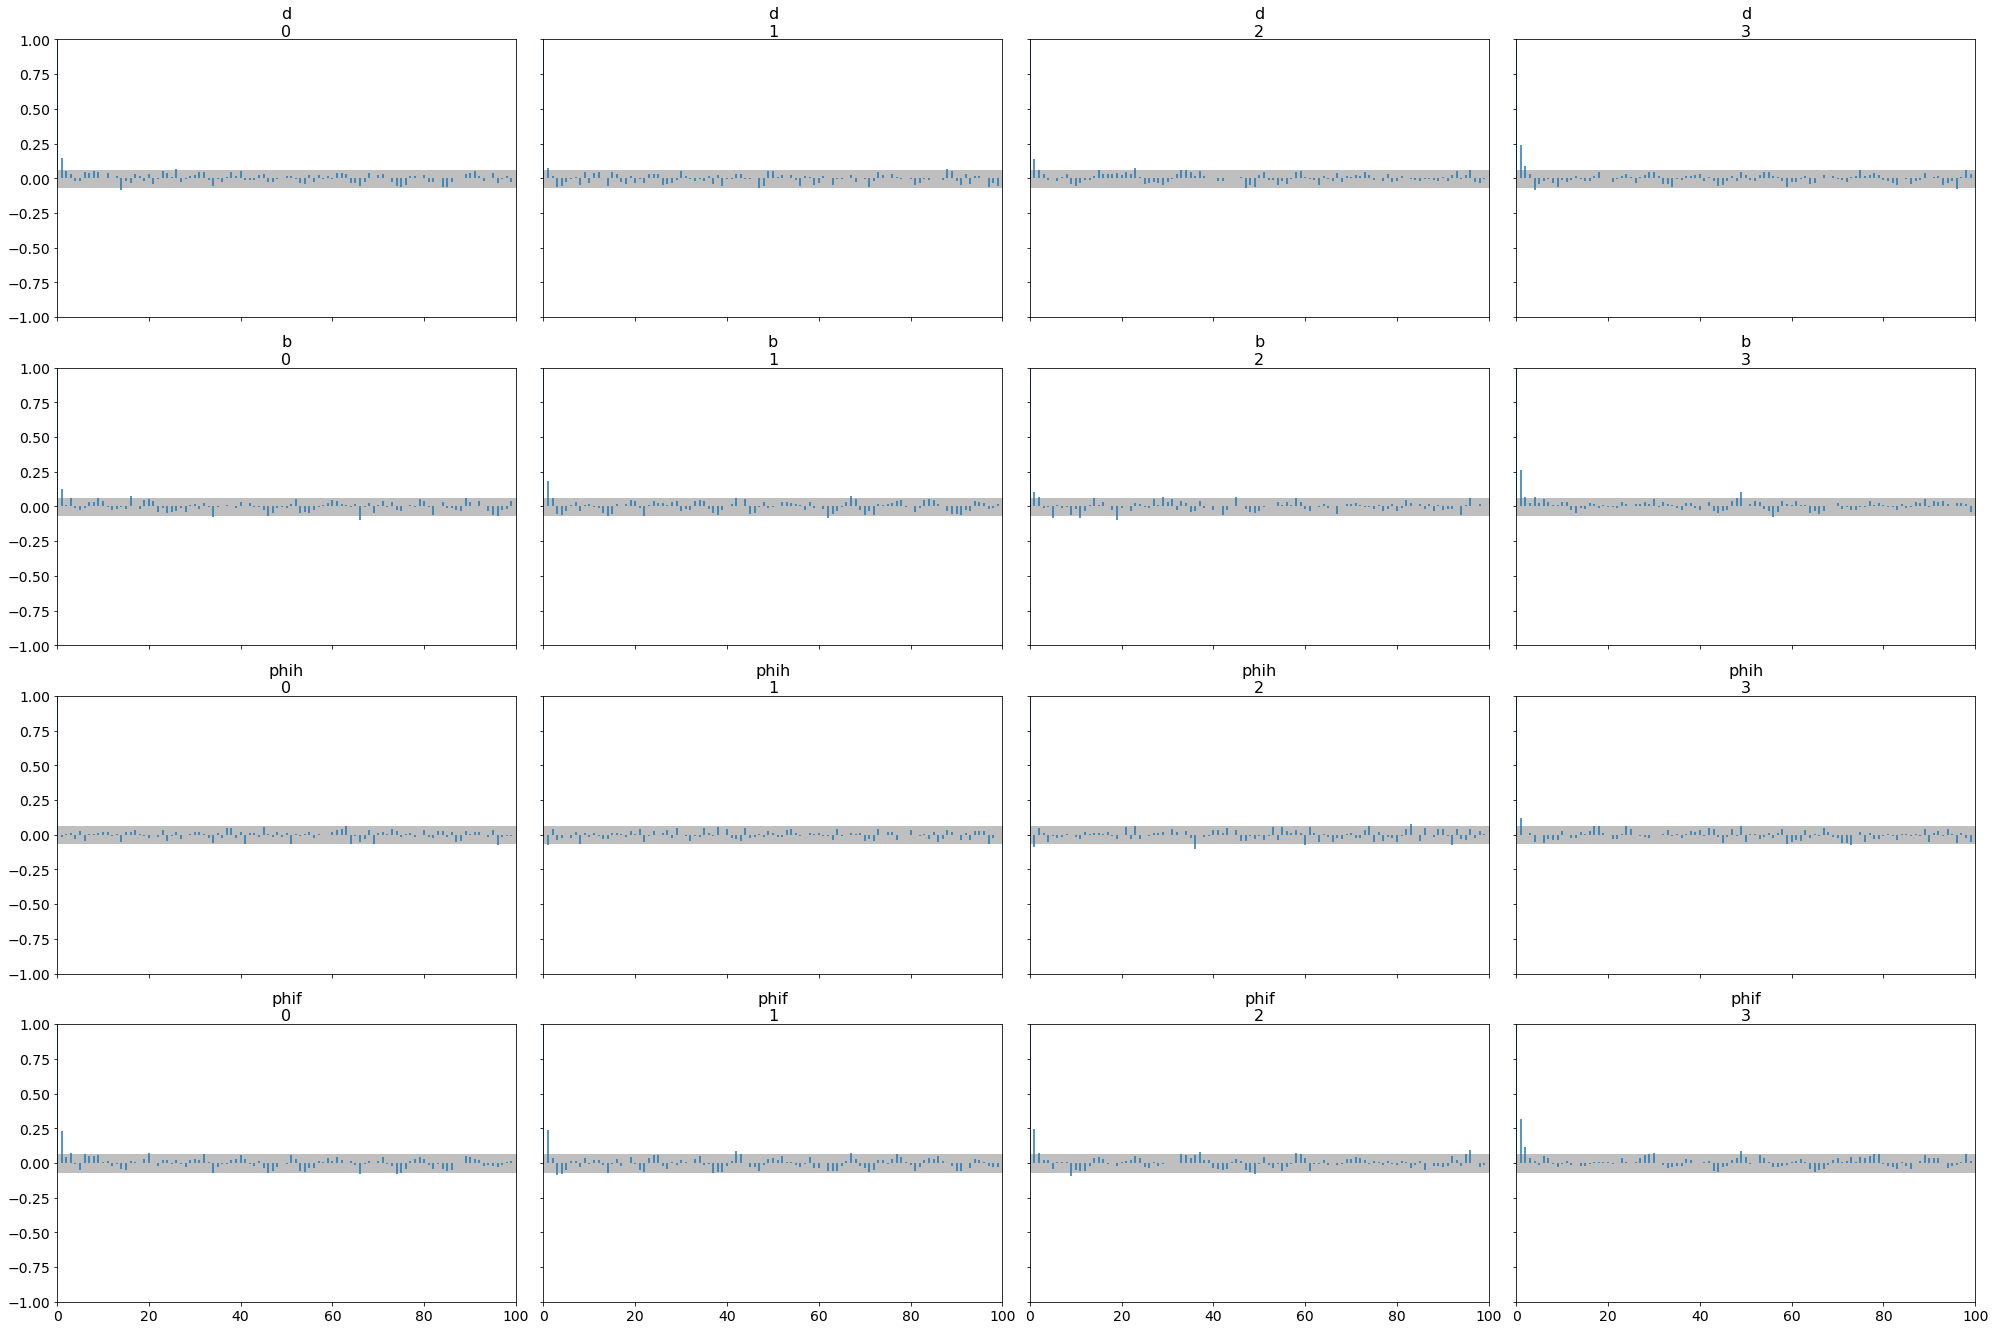

In [70]:
az.plot_autocorr(fit);

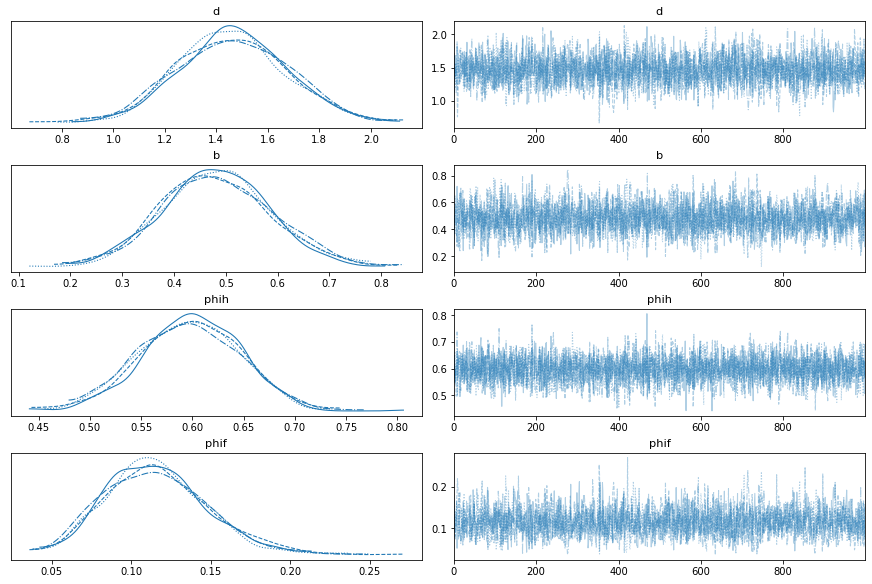

In [72]:
az.plot_trace(fit);

#  References

Farrell, S., & Lewandowsky, S. (2019). Computational modelling of cognition and behaviour. New york, NY: Cambridge University Press.